In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRFRegressor
from sklearn.metrics import explained_variance_score
import seaborn as sns

In [2]:
df = pd.read_csv('audi.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [4]:
#chceck if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [5]:
#how many unique values in each column
for value in df:
  print(f'{value}: {df[value].nunique()}')

model: 26
year: 21
price: 3260
transmission: 3
mileage: 7725
fuelType: 3
tax: 37
mpg: 104
engineSize: 19


In [9]:
#one-hot encoding for fuelType, transmission and model
df_encoded = pd.get_dummies(df, columns=['fuelType','transmission','model'])

In [10]:
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,fuelType_Diesel,fuelType_Hybrid,fuelType_Petrol,transmission_Automatic,...,model_ RS5,model_ RS6,model_ RS7,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT
0,2017,12500,15735,150,55.4,1.4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2016,16500,36203,20,64.2,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,16800,25952,145,67.3,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
y = df['price'].values
X = df_encoded.drop('price',axis=1).values

In [33]:
#split data for train and test sets
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.4)
X_test, X_cv, y_test, y_cv = train_test_split(X_, y_, test_size=0.2)
del X_, y_

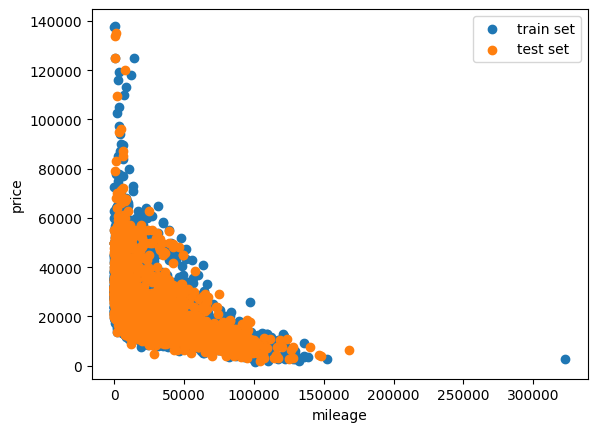

In [34]:
#plot mileage and price
plt.scatter(X_train[:,1], y_train,label='train set')
plt.scatter(X_test[:,1],y_test,label='test set')
plt.xlabel('mileage')
plt.ylabel('price')
plt.legend()
plt.show()

<ipython-input-35-e6c208009bd3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[columns].corr(),annot=True)


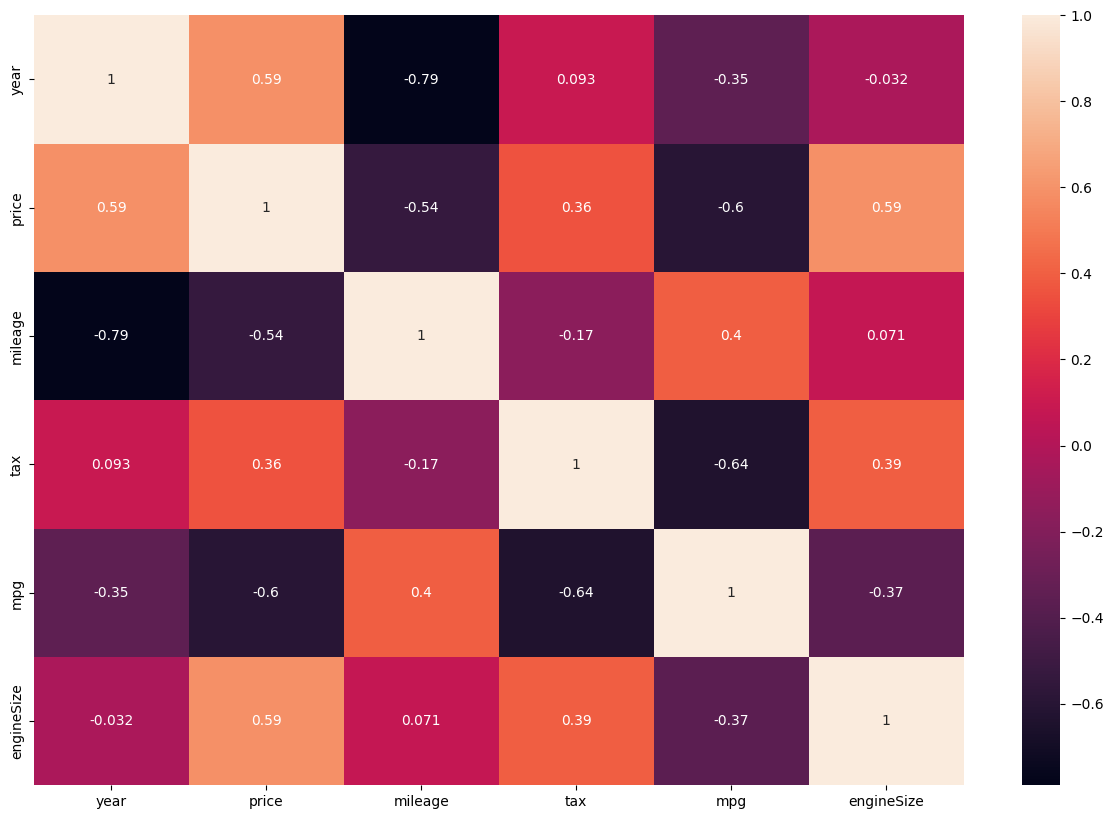

In [35]:
plt.figure(figsize=(15,10))
columns =['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize']
sns.heatmap(df[columns].corr(),annot=True)
plt.show()

In [39]:
#multiple linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_score = lr.score(X_cv, y_cv)
lr_pred = lr.predict(X_cv)
lr_evs = explained_variance_score(lr_pred, y_cv)

In [40]:
#decision tree
dr = DecisionTreeRegressor()
dr.fit(X_train, y_train)
dr_score = dr.score(X_cv, y_cv)
dr_pred = dr.predict(X_cv)
dr_evs = explained_variance_score(dr_pred, y_cv)

In [41]:
#random forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_score = rf.score(X_cv, y_cv)
rf_pred = rf.predict(X_cv)
rf_evs = explained_variance_score(rf_pred, y_cv)

In [43]:
#XGBoost
xgb = XGBRFRegressor()
xgb.fit(X_train, y_train)
xgb_score = xgb.score(X_cv, y_cv)
xgb_pred = xgb.predict(X_cv)
xgb_evs = explained_variance_score(xgb_pred, y_cv)

In [54]:
print(f'Multiple regression score: {round(lr_score,4)}| explained variance score: {round(lr_evs,4)}')
print(f'Decision Tree score: {round(dr_score,4)}      | explained variance score: {round(dr_evs,4)}')
print(f'Random Forest score: {round(rf_score,4)}      | explained variance score: {round(rf_evs,4)}')
print(f'XGBoost score: {round(xgb_score,4)}            | explained variance score: {round(xgb_evs,4)}')

Multiple regression score: 0.9023| explained variance score: 0.887
Decision Tree score: 0.9318      | explained variance score: 0.9323
Random Forest score: 0.9445      | explained variance score: 0.9414
XGBoost score: 0.9158            | explained variance score: 0.8971


In [55]:
#the best is random forest
prediction = rf.predict(X_test)
print(f'Test set explained variance score: {round(explained_variance_score(prediction, y_test),4)}')

Test set explained variance score: 0.9577


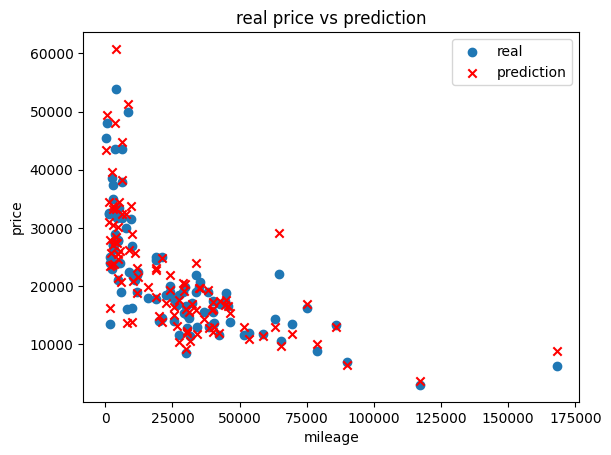

In [68]:
plt.scatter(X_test[:100, 1],y_test[:100],label='real')
plt.scatter(X_test[:100, 1],prediction[:100],marker='x',c='r',label='prediction')
plt.xlabel('mileage')
plt.ylabel('price')
plt.title('real price vs prediction')
plt.legend()
plt.show()

In [72]:
print("REAL  |  PREDICTION")
for i in range(20):
  print(y_test[i], " | ",prediction[i] )

REAL  |  PREDICTION
8770  |  10094.41
53900  |  60770.52
32400  |  34382.13
20995  |  25632.8
11799  |  11462.15
16500  |  16128.15
2995  |  3694.4
16298  |  16893.864166666666
26302  |  23756.93
18910  |  18749.37
19895  |  20321.6
6195  |  8846.02
13700  |  12972.66
21965  |  23983.25
16990  |  17510.38
17995  |  19777.64
15490  |  14281.19
21490  |  20790.5
49850  |  51256.31666666666
11999  |  10943.44
